In [1]:
# Imports
import pandas as pd
import numpy as np

In [2]:
# Define functiont to connect to the DB
from pymongo import MongoClient



def _connect_mongo(host, port, db):
    mongo_str = 'mongodb://%s:%s/%s' % (host, port, db)
    client = MongoClient(mongo_str)
    return client[db]

def read_mongo(db, collection, query={}, host = 'localhost', port = 27017, no_id = True):
    """Read from MongoDB and store into DataFrame"""

    # Connect to MongoDB
    db = _connect_mongo(host = host, port = port, db = db)

    # Query to specific DB and collection
    collection = db[collection].find(query)

    # Create DataFrame
    global df
    df = pd.DataFrame(list(collection))

    # Delete the _id
    if no_id:
        del df['_id']

In [3]:
# Connect to the DB
read_mongo('workshopdb','zapis2',{}, '192.168.84.17')

In [4]:
df.head(10)

,deviceAddress,proximity,real_timestamp,rssi,scanType,sourceId,timestamp,trackingId
0,e2:02:00:04:d7:40,FAR,1505402252,-95,BLE,HNenF,1505402246,mabs
1,e2:02:00:04:d7:40,FAR,1505402252,-100,BLE,ZN6Xd,1505402249,mabs
2,e2:02:00:04:d7:40,FAR,1505402253,-95,BLE,HNenF,1505402246,mabs
3,e2:02:00:04:d7:40,FAR,1505402253,-100,BLE,ZN6Xd,1505402249,mabs
4,e2:02:00:04:d7:40,FAR,1505402254,-100,BLE,ZN6Xd,1505402249,mabs
5,e2:02:00:04:d7:40,FAR,1505402255,-100,BLE,ZN6Xd,1505402249,mabs
6,e2:02:00:04:d7:40,FAR,1505402256,-100,BLE,ZN6Xd,1505402249,mabs
7,e2:02:00:04:d7:40,FAR,1505402263,-103,BLE,QQhDc,1505402261,mabs
8,e2:02:00:04:d7:40,FAR,1505402264,-103,BLE,QQhDc,1505402261,mabs
9,e2:02:00:04:d7:40,FAR,1505402265,-84,BLE,HNenF,1505402262,mabs


In [5]:
# Function that helps calculate distance rather than rssi
def rssi_to_distance(rssi):

    ### Declare local variable TxPower
    # This is value of rssi @ 1m
    TxPower = -65
    ratio = rssi * 1.0 / TxPower
    
    # If rssi was 0
    if (rssi == 0):
      return -1
    
    if (ratio < 1.0):
        return ratio**10
    else:
      dist = (0.89976) * (ratio ** 7.7095) + 0.111
    return dist

In [6]:
# Add column that will store distance from the GTW
df["dist"] = df.apply(lambda row: rssi_to_distance(row['rssi']), axis=1)
df.head(20)

,deviceAddress,proximity,real_timestamp,rssi,scanType,sourceId,timestamp,trackingId,dist
0,e2:02:00:04:d7:40,FAR,1505402252,-95,BLE,HNenF,1505402246,mabs,16.888656
1,e2:02:00:04:d7:40,FAR,1505402252,-100,BLE,ZN6Xd,1505402249,mabs,25.026589
2,e2:02:00:04:d7:40,FAR,1505402253,-95,BLE,HNenF,1505402246,mabs,16.888656
3,e2:02:00:04:d7:40,FAR,1505402253,-100,BLE,ZN6Xd,1505402249,mabs,25.026589
4,e2:02:00:04:d7:40,FAR,1505402254,-100,BLE,ZN6Xd,1505402249,mabs,25.026589
5,e2:02:00:04:d7:40,FAR,1505402255,-100,BLE,ZN6Xd,1505402249,mabs,25.026589
6,e2:02:00:04:d7:40,FAR,1505402256,-100,BLE,ZN6Xd,1505402249,mabs,25.026589
7,e2:02:00:04:d7:40,FAR,1505402263,-103,BLE,QQhDc,1505402261,mabs,31.403463
8,e2:02:00:04:d7:40,FAR,1505402264,-103,BLE,QQhDc,1505402261,mabs,31.403463
9,e2:02:00:04:d7:40,FAR,1505402265,-84,BLE,HNenF,1505402262,mabs,6.607842


In [7]:
#Calculate the max delay between MQTT broker and the real time
max(df['real_timestamp'] - df['timestamp'])

11

In [8]:
import matplotlib.pyplot as plt

In [9]:
# In order to plot we need to replace the sourceId with different unique number
def replace_sourceId(sourceID):
    if (sourceID == '8JRGb'):
        return 0
    if sourceID == '9McaT':
        return 1
    if sourceID == 'H3vx9':
        return 2
    if sourceID == 'HNenF':
        return 3
    if sourceID == 'QQhDc':
        return 4
    if sourceID == 'ZN6Xd':
        return 5
    if sourceID == 'rNt0R':
        return 6

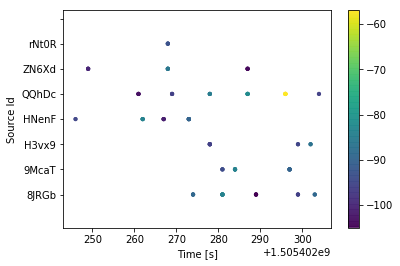

In [11]:
list_sourceIds = ['8JRGb', '9McaT', 'H3vx9', 'HNenF', 'QQhDc','ZN6Xd', 'rNt0R']   

# Apply numbers to the DF
df['sourceId_number'] = df['sourceId'].apply(lambda sid: replace_sourceId(sid))

area = 10
plt.xlabel('Time [s]')
plt.ylabel('Source Id')
plt.yticks(df.index, list_sourceIds)
plt.scatter(df['timestamp'], df['sourceId_number'], s=area, c=df['rssi'], alpha=0.8)
plt.colorbar()

plt.show()